In [3]:
#https://automating-gis-processes.github.io/CSC/notebooks/L5/plotting-raster.html
import os
import numpy as np

import rasterio
from rasterio.plot import show
from rasterio import plot
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage import exposure

In [4]:
%matplotlib inline

#data folder
f = '/Users/Zack/0_blacksky/BSG-102-20200410-092842-1269688-ortho/'

#filename
n = 'BSG-102-20200410-092842-1269688_ortho.tif'

#filepath
fp = os.path.join(f+n)

#open the file:
raster = rasterio.open(fp)

Text(0.5, 1.0, 'Blue')

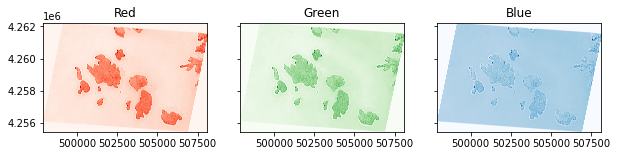

In [5]:
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 1), cmap='Reds', ax=ax1)
show((raster, 2), cmap='Greens', ax=ax2)
show((raster, 3), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

Normalized bands
0.0 - 1.0 mean: 0.13531325016360257
0.0 - 1.0 mean: 0.15664554529587102
0.0 - 1.0 mean: 0.2756242976493087


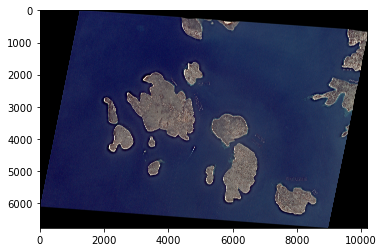

In [6]:
# Read the grid values into numpy arrays
red = raster.read(1)
green = raster.read(2)
blue = raster.read(3)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
plt.imshow(rgb)

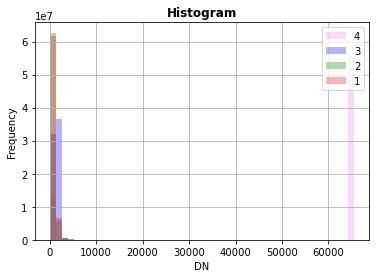

In [7]:
#histogram
from rasterio.plot import show_hist
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

In [9]:
#export raster...
#https://clouds.eos.ubc.ca/~phil/courses/atsc301/html/rasterio_demo.html